In [301]:
import numpy as np
import matplotlib.pyplot as plt

In [302]:
from loaders import clean_text_for_pattern_letter
from temp_text_puh import template_str
# input_str = clean_text_for_pattern_letter(template_str, out_len=len(template_str))
input_str = clean_text_for_pattern_letter(template_str, out_len=5000)
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
5000
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [303]:
def predict_train(input_str,
                  letters,
                  max_history=4,
                  max_index: int = 4,):
    WIN: dict[str, dict[str, int]] = {}

    HistoryHW: list[dict[str, int]] = []
    HistoryW: list[dict[str, dict[str, dict[int, int]]]] = []

    for h_idx in range(max_history):
        HistoryHW.append({})
        HistoryW.append({})

    IDX: list = []

    for letter in letters:
        WIN.setdefault(letter, {})

        for idx in range(max_index):
            WIN[letter].setdefault(idx, 0)

    prev_indices = [0]

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            WIN[inp][prev_indices[0]] += 1
            continue

        IDX.append(prev_indices[0])

        IdxO = {}

        for h_idx in range(max_history):
            prev_idx = inp_idx - 1 - h_idx
            if prev_idx < 0:
                break

            prev_inp = input_str[prev_idx]

            HW = HistoryHW[h_idx]
            W = HistoryW[h_idx]

            key_HW = prev_inp + str(prev_indices[h_idx]) + ':' + inp

            if HW.get(key_HW, -1) != -1:
                inp_has_index = HW[key_HW]

                IdxO.setdefault(inp_has_index, 0)
                IdxO[inp_has_index] += 1

        new_index = 0
        if len(IdxO) == 0:
            new_index = min(WIN[inp], key=WIN[inp].get)
            WIN[inp][new_index] += 1
        else:
            new_index = max(IdxO, key=IdxO.get)

        for h_idx in range(max_history):
            prev_idx = inp_idx - 1 - h_idx
            if prev_idx < 0:
                break

            prev_inp = input_str[prev_idx]

            key_I = prev_inp + str(prev_indices[h_idx])
            HistoryW[h_idx].setdefault(key_I, {})
            HistoryW[h_idx][key_I].setdefault(inp, {})
            HistoryW[h_idx][key_I][inp].setdefault(new_index, 0)
            HistoryW[h_idx][key_I][inp][new_index] += 1

            key_HW = prev_inp + str(prev_indices[h_idx]) + ':' + inp

            HistoryHW[h_idx].setdefault(key_HW, new_index)

        # recurtion
        prev_indices.insert(0, new_index)
        if len(prev_indices) > max_history:
            prev_indices = prev_indices[:-1]

    return HistoryW, HistoryHW, IDX


max_index_L1 = 32
max_history_L1 = 6

HistoryW, HistoryHW, IDX = predict_train(input_str, letters, max_history=max_history_L1, max_index=max_index_L1)

for h_idx in range(max_history_L1):
    for wk, wv in HistoryW[h_idx].items():
        print(wk, wv)


c0 {'h': {0: 1}}
h0 {'a': {0: 1}, 'i': {30: 1}}
a0 {'p': {0: 1}, 't': {6: 3}}
p0 {'t': {0: 1}, 'i': {7: 1}}
t0 {'e': {0: 1}, ' ': {12: 6}, 't': {28: 2}, 'h': {16: 4}, 'o': {4: 1}}
e0 {'r': {0: 1}, 'l': {6: 1}, 't': {0: 1}, ' ': {9: 3}, 'a': {24: 1}, 'e': {19: 1}, 's': {26: 1}}
r0 {' ': {0: 2}, 'i': {2: 1}, 'e': {19: 2}, 'g': {14: 1}, 's': {10: 1}}
 0 {'i': {0: 1}, 'b': {7: 1}, 'h': {21: 2}, 's': {28: 1}, 'o': {24: 1}, 'd': {30: 1}, 't': {27: 2}}
i0 {'n': {0: 5, 6: 1}, 'd': {18: 3}, 'e': {6: 1}, 's': {11: 1}, 't': {19: 1, 5: 1}, 'l': {12: 1}, ' ': {12: 2, 26: 1}}
n0 {' ': {1: 1}, "'": {1: 1}, 'o': {9: 1}, 'g': {18: 4}, 'c': {23: 1}}
 1 {'w': {0: 3}, 'c': {5: 3}, 'f': {7: 2}, 'h': {24: 2}, 'a': {6: 3, 11: 1, 16: 1}, 'i': {11: 1}, 't': {28: 3}, 'b': {25: 4}, 'n': {26: 1}, 'l': {7: 1}, 's': {10: 2}, "'": {21: 1}}
w0 {'h': {1: 1}, ' ': {28: 1}, 'i': {22: 1}, 'o': {21: 2}}
h1 {'i': {1: 1}, 'r': {8: 2}, 'e': {7: 2}, ' ': {24: 4}}
i1 {'c': {1: 2}, 'd': {2: 6}, ' ': {8: 2}, 'k': {10: 1}, 's': {

In [304]:
def predict(input_str: str, 
            HistoryW: list[dict[str, dict[str, dict[int, int]]]], 
            max_history = 4,
            max_index = 4,):
    err = 0

    history_indices = []
    history_indices.append([x for x in range(max_index)])

    for input_idx, input in enumerate(input_str[:-1]):
        HO: dict[str, dict[int, int]] = {}

        for h_idx in range(max_history):
            inp_idx = input_idx - h_idx
            if inp_idx < 0:
                break
            # print(f'{h_idx=} {inp_idx=}')
            W = HistoryW[h_idx]
            inp = input_str[inp_idx]
            indices = history_indices[h_idx]

            key_I = inp + str(indices[0])
            O = W.get(key_I, {})
            # print(f'{O=}')
            # print()

            for index in indices[1:]:
                key_I = inp + str(index)

                index_O = W.get(key_I, {})
                # print(f'{index_O=}')
                # print()

                for key, val in index_O.items():
                    O.setdefault(key, {})
                    O[key].update(val)
            
            # print(f'{O=}')
            # print()
            
            for key_O, val_O in O.items():
                HO.setdefault(key_O, {})
                
                for key_index, val_index in val_O.items():
                    HO[key_O].setdefault(key_index, 0)

                    HO[key_O][key_index] += val_index

        # print(f'{HO=}')
        # print()
        max_symbol = 'a'
        max_symbol_index = 0
        max_val = 0
        for key, val in HO.items():
            max_idx = max(val, key=val.get)
            HO[key] = {max_idx: val[max_idx]}

            if val[max_idx] > max_val:
                max_val = val[max_idx]
                max_symbol_index = max_idx
                max_symbol = key

        # print(f'{HO=}')
        next_inp = input_str[input_idx + 1]
        print(f'{max_symbol=}', f'{next_inp=}', max_symbol_index, max_val)

        new_indices = [max_symbol_index]

        # err
        if max_symbol != next_inp:
            err += 1

            index_stats = HO.get(next_inp, 0)
            
            if index_stats == 0:
                new_indices = [x for x in range(max_index)]
                print(f'{new_indices=}')
            else:
                max_symbol_index = list(index_stats.keys())[0]

                new_indices = [max_symbol_index]
        
        # recurtion
        history_indices.insert(0, new_indices)
        if len(history_indices) > max_history:
            history_indices = history_indices[:-1]

    return err

err_L1 = predict(input_str, HistoryW, max_index=max_index_L1, max_history=max_history_L1)

print(err_L1, err_L1 / (len(input_str) / 100))

max_symbol='o' next_inp='h' 4 3
max_symbol=' ' next_inp='a' 24 4
max_symbol='i' next_inp='p' 15 4
max_symbol='s' next_inp='t' 8 4
max_symbol=' ' next_inp='e' 12 7
max_symbol='r' next_inp='r' 0 5
max_symbol=' ' next_inp=' ' 0 6
max_symbol='i' next_inp='i' 0 7
max_symbol='n' next_inp='n' 0 10
max_symbol=' ' next_inp=' ' 1 10
max_symbol='w' next_inp='w' 0 9
max_symbol='h' next_inp='h' 1 9
max_symbol='i' next_inp='i' 1 9
max_symbol='c' next_inp='c' 1 8
max_symbol='h' next_inp='h' 2 7
max_symbol=' ' next_inp=' ' 2 13
max_symbol='w' next_inp='w' 1 9
max_symbol=' ' next_inp='e' 12 8
max_symbol=' ' next_inp=' ' 3 15
max_symbol='a' next_inp='a' 1 14
max_symbol='r' next_inp='r' 1 8
max_symbol='e' next_inp='e' 2 15
max_symbol=' ' next_inp=' ' 4 32
max_symbol='t' next_inp='i' 27 15
max_symbol='e' next_inp='n' 2 15
max_symbol='t' next_inp='t' 1 13
max_symbol='r' next_inp='r' 2 15
max_symbol='o' next_inp='o' 0 17
max_symbol='d' next_inp='d' 0 11
max_symbol='u' next_inp='u' 0 12
max_symbol='c' next_i

In [305]:
def get_TF(input_str: str, W: dict[str, dict[str, int]], IDX: list):
    TF = []

    for inp_idx, inp in enumerate(input_str[:-1]):
        index = IDX[inp_idx]

        key_I = inp + str(index)
        I = W[key_I]

        tf = len(I)

        TF.append(tf)
    
    TF.append(0)

    return TF

TF = get_TF(input_str, W, IDX)
print(TF)

KeyError: 'h2'

In [ ]:
def get_word_stats(input_str: str | list, TF: list, ):
    buffer: list = [input_str[0]]
    WordStats: dict[str, int] = {}

    prev_tf = TF[0]

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            continue

        if TF[inp_idx] - prev_tf > 0.0: # and abs(TF[inp_idx] - prev_tf) > 0.2:
            word = ''.join(buffer)

            WordStats.setdefault(word, 0)
            WordStats[word] += 1

            buffer = [inp]
            prev_tf = TF[inp_idx]
            
            continue

        buffer.append(inp)
        prev_tf = TF[inp_idx]
    
    # sort
    WordStats = dict(sorted(WordStats.items(), key=lambda item: item[1], reverse=True))

    return WordStats

WordStats_L1 = get_word_stats(input_str=input_str, TF=TF)
print(len(WordStats_L1))
mean_WS = np.mean(np.array(list(WordStats_L1.values())))
print(f'{mean_WS=}')
WS_len = 0
for key, val in WordStats_L1.items():
    if len(key.strip()) > 1 and val >= mean_WS:
        WS_len += 1
    print(key, val)
print(f'{WS_len=}')

100
mean_WS=2.3
t 13
 a 11
 th 9
s 9
er 8
i 8
 h 7
n 6
 w 6
nd 6
 bu 5
 o 5
h 4
 b 4
m 4
c 3
 i 3
 c 3
ng 3
p 3
f 3
y 3
e i 2
ntro 2
du 2
ed 2
 t 2
nni 2
e th 2
e p 2
o 2
oh 2
 som 2
es 2
e is 2
d 2
om 2
 dow 2
ta 2
rs 2
op 2
 is 2
nl 2
ay 2
e f 2
eel 2
a 2
en 2
ap 1
hic 1
e ar 1
o w 1
e b 1
ees 1
e s 1
ori 1
eg 1
  1
edw 1
ar 1
ear 1
 now 1
e back 1
 his 1
ead 1
ehi 1
hr 1
 ro 1
bi 1
 far 1
e k 1
now 1
e o 1
etim 1
e r 1
eall 1
no 1
th 1
 if 1
e c 1
oul 1
 s 1
pi 1
 for 1
 mom 1
 thi 1
nk 1
 p 1
hap 1
e isn' 1
ny 1
how 1
e h 1
e bo 1
tom 1
 r 1
eady 1
 to 1
o y 1
ou 1
WS_len=5


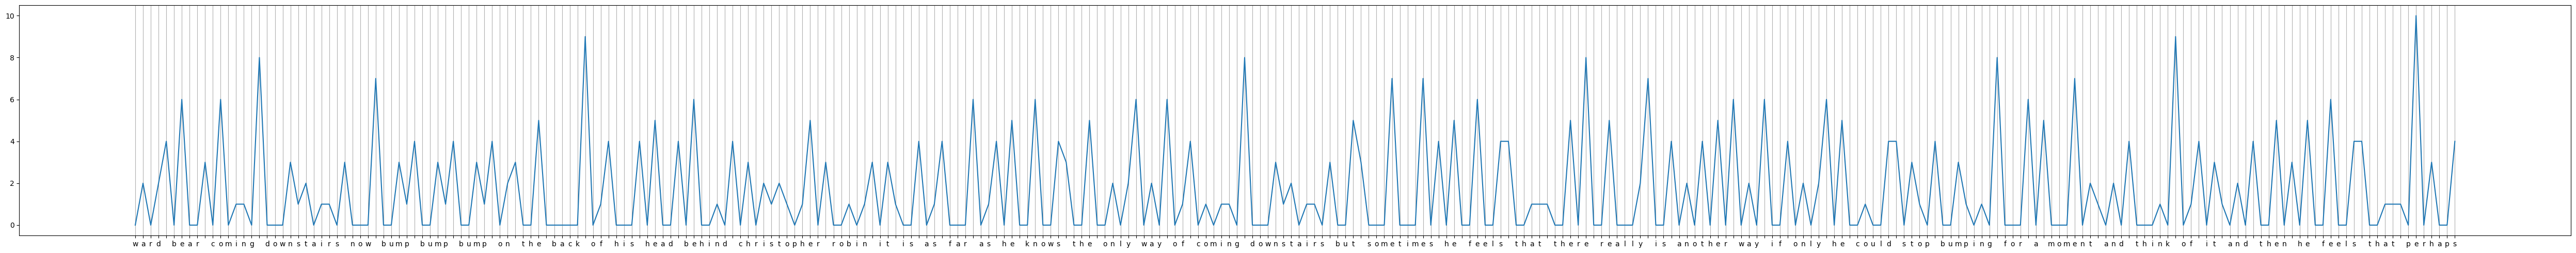

In [ ]:
begin = 100
length = 400

arr_TF = np.array(TF, dtype=float)

arr_TF = np.pad(arr_TF, (1, 0))[:-1] - arr_TF
arr_TF[arr_TF > 0] = 0
arr_TF = np.abs(arr_TF)

arr_TF = arr_TF[begin:length]

fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
axs.plot(np.arange(arr_TF.size), arr_TF)
axs.xaxis.set_ticks(np.arange(len(input_str[begin:length])) ,input_str[begin:length])
axs.xaxis.grid(True)

plt.show()